In [2]:
import os

for dirnames, dirpath, filenames in os.walk("/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 100 directories and 0 images in '['Fracture Dislocation', 'Longitudinal fracture', 'Impacted fracture', 'Avulsion fracture', 'Greenstick fracture', 'Oblique fracture', 'Comminuted fracture', 'Pathological fracture', 'Hairline Fracture', 'Spiral Fracture']'
There are 121 directories and 0 images in '['Test', 'Train']'
There are 126 directories and 19 images in '[]'
There are 127 directories and 137 images in '[]'
There are 122 directories and 0 images in '['Test', 'Train']'
There are 127 directories and 12 images in '[]'
There are 128 directories and 68 images in '[]'
There are 118 directories and 0 images in '['Test', 'Train']'
There are 123 directories and 9 images in '[]'
There are 124 directories and 75 images in '[]'
There are 118 directories and 0 images in '['Test', 'Train']'
There are 123 directories and 14 images in '[]'
There are 124 directories and 109 images in '[]'
There are 120 directories and 0 images in '['Test', 'Train']'
There are 125 directories and 16 image

In [3]:
data_dir = "/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification"

In [4]:
import pathlib
import numpy as np
dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in dir.glob("*")]))

In [5]:
print(class_names)

['Avulsion fracture' 'Comminuted fracture' 'Fracture Dislocation'
 'Greenstick fracture' 'Hairline Fracture' 'Impacted fracture'
 'Longitudinal fracture' 'Oblique fracture' 'Pathological fracture'
 'Spiral Fracture']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  # plt.title(target_class)
  plt.axis('off');
  print(f"Image shape: {img.shape}")
  # return img

Image shape: (640, 640, 3)


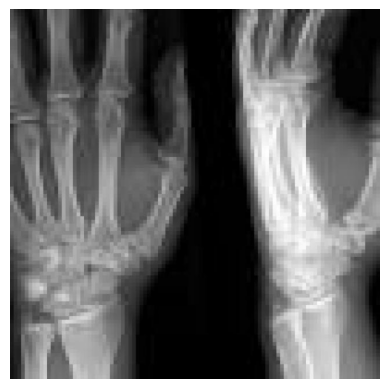

In [7]:
view_random_image("/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Avulsion fracture/", "Train")

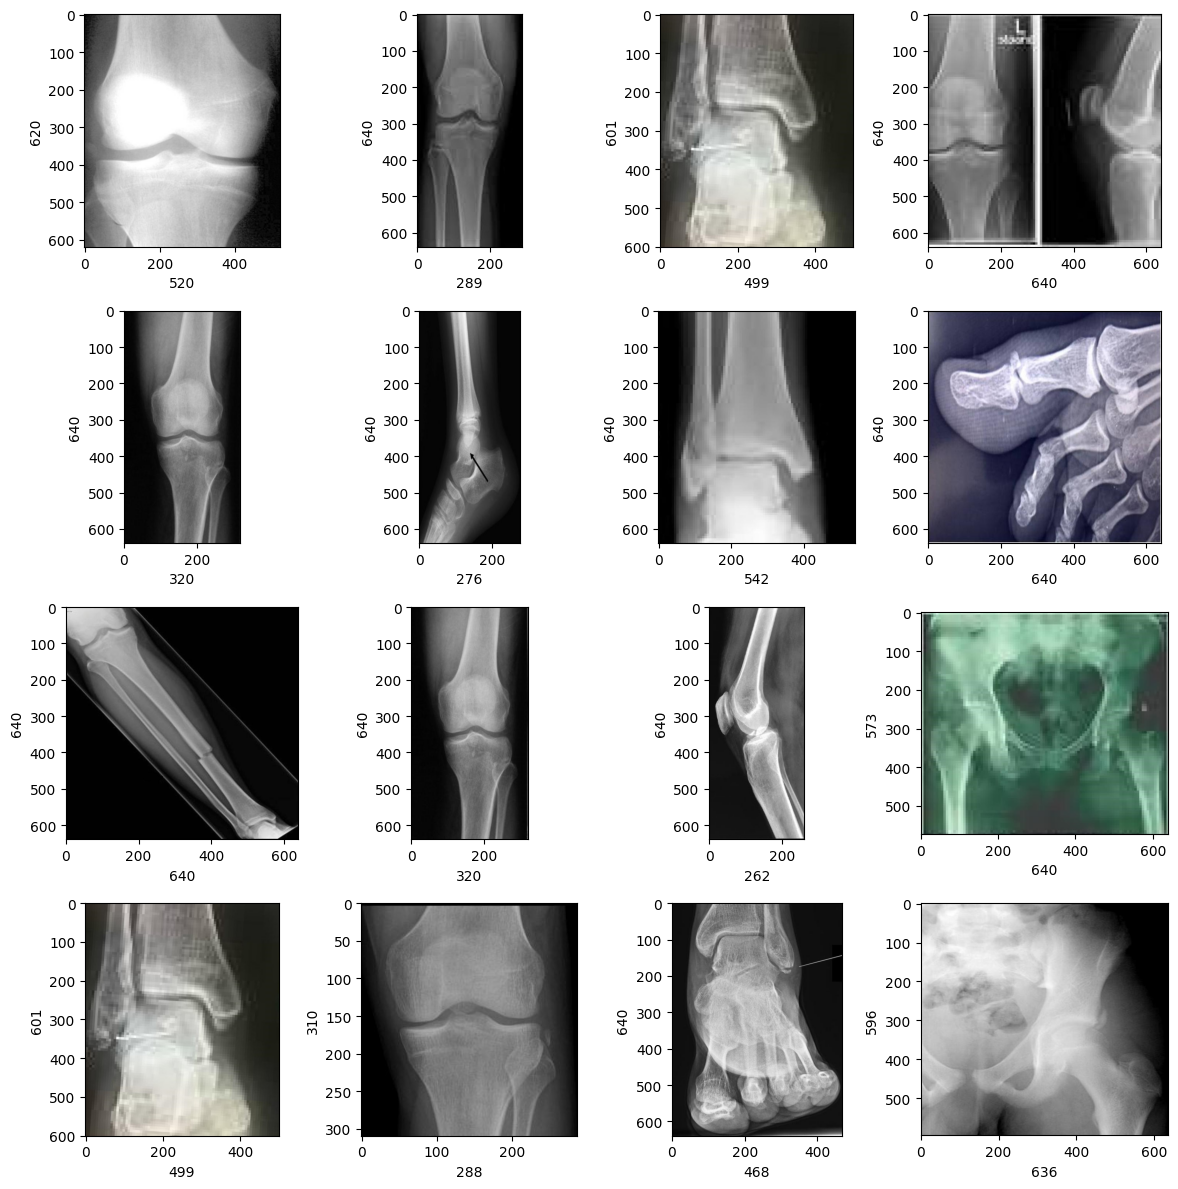

In [8]:
from matplotlib.image import imread
plt.figure(figsize = (12, 12))
path = '/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Avulsion fracture/Train'
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [9]:
# Step 1: Collect image paths and metadata into a DataFrame
def collect_image_path(data_dir):
  data = []

  # Walk through each directory
  for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    print(class_path)
    if os.path.isdir(class_path):
      for split in ["Train", "Test"]:
        split_path = os.path.join(class_path, split)

        if os.path.isdir(split_path):
          for image_name in os.listdir(split_path):
            image_path = os.path.join(split_path, image_name)
            data.append({
                'path': image_path,
                'target': class_folder,
                'split': split
            })
  return data

In [10]:
data = collect_image_path(data_dir)

/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Fracture Dislocation
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Longitudinal fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Impacted fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Avulsion fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Greenstick fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Oblique fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Comminuted fracture
/content/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Pathological fracture
/content/bone-break-classification

In [11]:
import pandas as pd
df = pd.DataFrame(data)

In [12]:
df.head()

,path,target,split
0,/content/bone-break-classification-image-datas...,Fracture Dislocation,Train
1,/content/bone-break-classification-image-datas...,Fracture Dislocation,Train
2,/content/bone-break-classification-image-datas...,Fracture Dislocation,Train
3,/content/bone-break-classification-image-datas...,Fracture Dislocation,Train
4,/content/bone-break-classification-image-datas...,Fracture Dislocation,Train


In [13]:
df.shape

(1129, 3)

In [14]:
df.split.value_counts()

,count
split,
Train,989
Test,140


In [15]:
df.target.value_counts()

,count
target,
Fracture Dislocation,156
Comminuted fracture,148
Pathological fracture,134
Avulsion fracture,123
Greenstick fracture,122
Hairline Fracture,111
Spiral Fracture,86
Oblique fracture,85
Impacted fracture,84


In [16]:
batch_size = 10
img_height = 224
img_width = 224

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True
)

In [18]:
# Create data loaders
train_generator = datagen.flow_from_dataframe(
    dataframe = df[df['split'] == 'Train'],
    x_col = 'path',
    y_col = 'target',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe = df[df['split'] == 'Test'],
    x_col = 'path',
    y_col = 'target',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 989 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.


In [19]:
images, labels = next(train_generator)

In [20]:
def plot_images(generator, num_images = 10):
  images, label = next(generator)
  plt.figure(figsize = (20, 10))

  for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}, Pixels: {images[i].min()} - {images[i].max()}\n Shape: {images[i].shape}")
    plt.axis('off')
  plt.show()

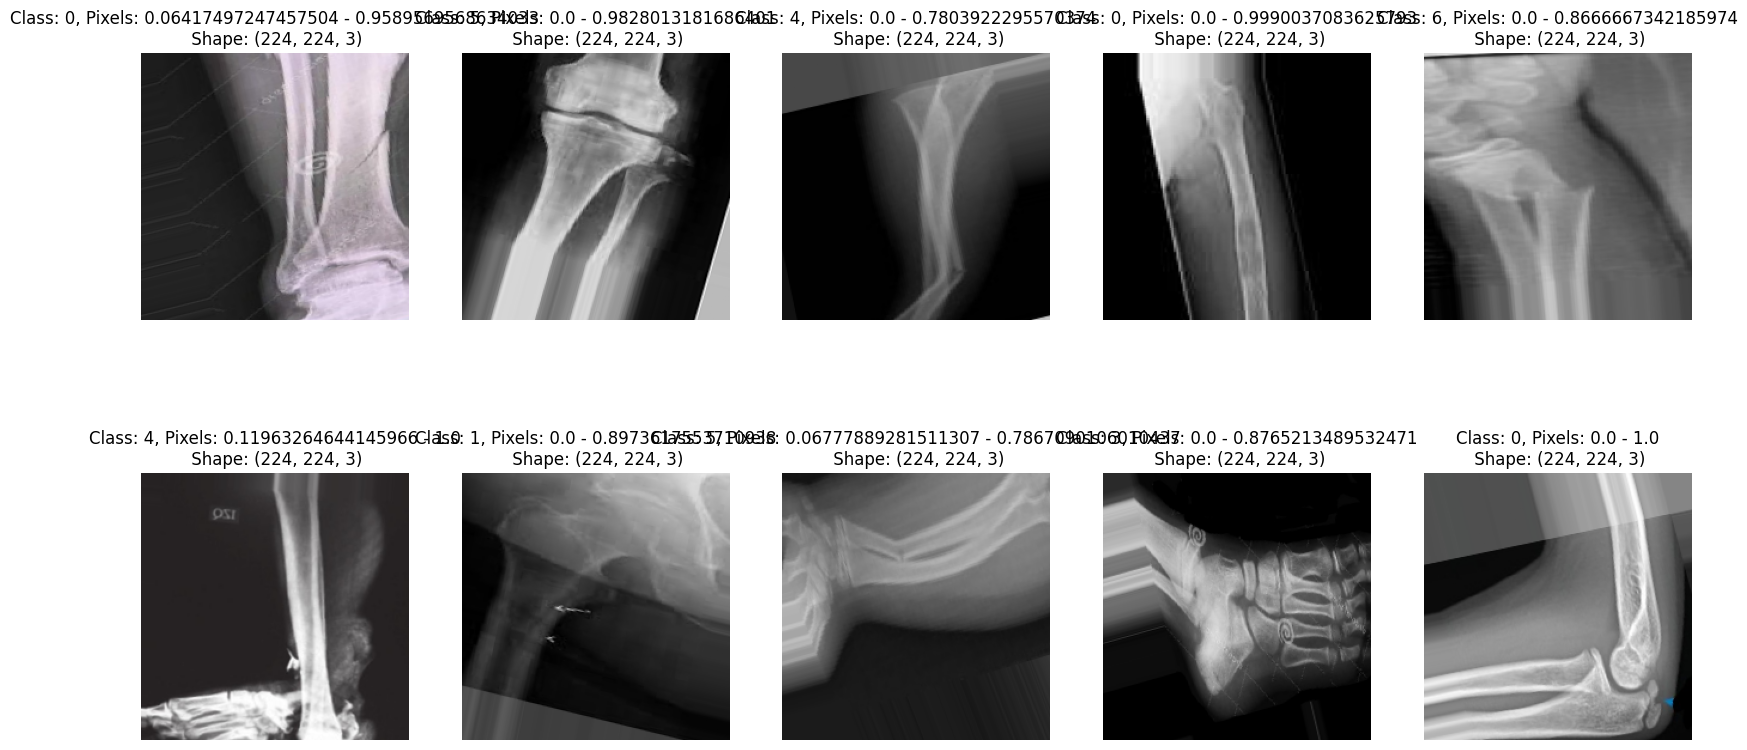

In [21]:
plot_images(train_generator, num_images=10)

##**Model Building**

In [22]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model1 = Sequential([
    Input(shape=(224, 224, 3)),  # Explicitly define the input shape here
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(40, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

In [23]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 373248)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │      14,929,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,006,018 (57.24 MB)

 Trainable params: 15,006,018 (57.24 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 27s 188ms/step - accuracy: 0.1143 - loss: 3.1637 - val_accuracy: 0.1214 - val_loss: 2.2983
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.1306 - loss: 2.2979 - val_accuracy: 0.1214 - val_loss: 2.2996
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.1465 - loss: 2.2893 - val_accuracy: 0.1286 - val_loss: 2.2999
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 241ms/step - accuracy: 0.1330 - loss: 2.2776 - val_accuracy: 0.1071 - val_loss: 2.3082
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - accuracy: 0.1620 - loss: 2.2735 - val_accuracy: 0.1643 - val_loss: 2.2828


<Axes: >

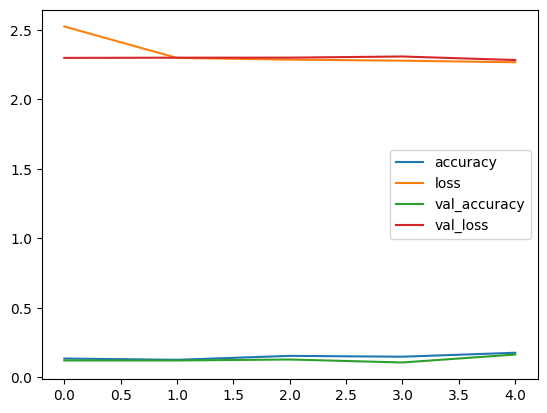

In [26]:
pd.DataFrame(history.history).plot()

##**InceptionNet**

In [67]:
from tensorflow.keras.applications import InceptionV3

In [68]:
base_model = InceptionV3(include_top = False)

In [69]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, None, None, 32) │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, None, None, 32) │             96 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, None, None, 32) │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, None, None, 32) │             96 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)       │ (None, None, None, 64) │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, None, None, 64) │            192 │ conv2d_192[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, None, None, 64) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, None, None, 64) │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_193 (Conv2D)       │ (None, None, None, 80) │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, None, None, 80) │            240 │ conv2d_193[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, None, None, 80) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_194 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [70]:
base_model.trainable = True

In [71]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, None, None, 32) │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, None, None, 32) │             96 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, None, None, 32) │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, None, None, 32) │             96 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)       │ (None, None, None, 64) │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, None, None, 64) │            192 │ conv2d_192[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, None, None, 64) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, None, None, 64) │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_193 (Conv2D)       │ (None, None, None, 80) │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, None, None, 80) │            240 │ conv2d_193[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, None, None, 80) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_194 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [72]:
for layer in base_model.layers[:-60]:
  layer.trainable = False

In [73]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, None, None, 32) │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, None, None, 32) │             96 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, None, None, 32) │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, None, None, 32) │             96 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, None, None, 32) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)       │ (None, None, None, 64) │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, None, None, 64) │            192 │ conv2d_192[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, None, None, 64) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, None, None, 64) │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_193 (Conv2D)       │ (None, None, None, 80) │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, None, None, 80) │            240 │ conv2d_193[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, None, None, 80) │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_194 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 10,540,992 (40.21 MB)

 Non-trainable params: 11,261,792 (42.96 MB)

In [74]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
inputs = Input(shape = (224, 224, 3))
x = base_model(inputs)
x = GlobalAveragePooling2D(name = "global_avg_pool")(x)
outputs = Dense(10, activation = "softmax", name = "output_layer")(x)

In [75]:
from tensorflow.keras.models import Model
model = Model(inputs, outputs)

In [76]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_avg_pool                      │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,823,274 (83.25 MB)

 Trainable params: 10,561,482 (40.29 MB)

 Non-trainable params: 11,261,792 (42.96 MB)

In [77]:
model.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [78]:
history2 = model.fit(train_generator,
                          validation_data=validation_generator,
                          epochs = 10)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 55s 318ms/step - accuracy: 0.2024 - loss: 2.3900 - val_accuracy: 0.2857 - val_loss: 3.3122
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.3911 - loss: 1.8272 - val_accuracy: 0.2143 - val_loss: 3.3028
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - accuracy: 0.4999 - loss: 1.5490 - val_accuracy: 0.2286 - val_loss: 2.8135
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.5217 - loss: 1.4424 - val_accuracy: 0.3857 - val_loss: 2.2874
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.5808 - loss: 1.2580 - val_accuracy: 0.3857 - val_loss: 2.7893
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.6302 - loss: 1.0928 - val_accuracy: 0.3000 - val_loss: 2.8926
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.6721 - loss: 0.9841 - val_accuracy: 0.3214 - val_loss: 2.8538
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.7163 - loss: 0.8852 - val_accu

<Axes: >

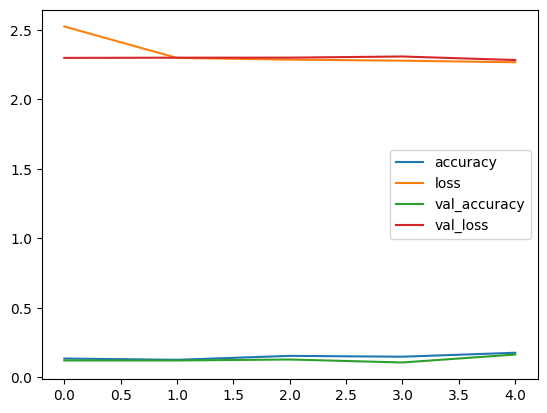

In [79]:
pd.DataFrame(history.history).plot()